In [8]:
from PIL import Image
from numpy import *
from pylab import *
from scipy import ndimage
import warp
import homography

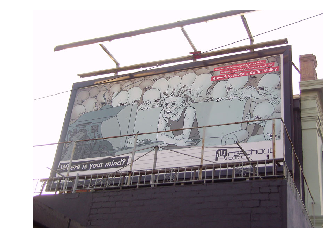

In [21]:
im1 = array(Image.open('billboard1.jpg'))
imshow(im1)
gray()
axis('off')
show()

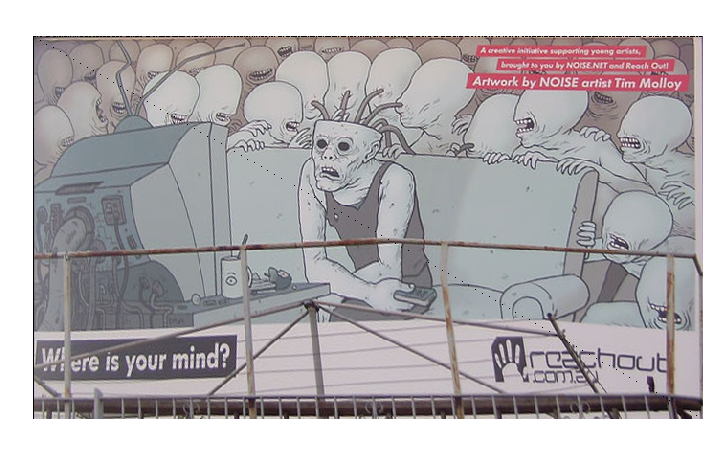

In [32]:
im2 = zeros((400, 700, 3))
m, n, cn = im2.shape

fp = array([[223, 494, 441, 126], [128, 60, 719, 717], [1, 1, 1, 1]])
tp = array([[0, m, m, 0], [0, 0, n, n], [1, 1, 1, 1]])

tp2 = tp[:, :3]
fp2 = fp[:, :3]
H = homography.Haffine_from_points(tp2, fp2)

im3 = zeros((400, 700, 3))
for color in range(3):
    im1_t = ndimage.affine_transform(im1[:, :, color], H[:2, :2], (H[0,2],H[1,2]), im2.shape[:2])
    alpha = warp.alpha_for_triangle(tp2, im2.shape[0], im2.shape[1])
    im3[:, :, color] = (1-alpha)*im2[:, :, color] + alpha*im1_t

tp2 = tp[:, [0,2,3]]
fp2 = fp[:, [0,2,3]]
H = homography.Haffine_from_points(tp2, fp2)

im4 = zeros((400, 700, 3))
for color in range(3):
    im1_t = ndimage.affine_transform(im1[:, :, color], H[:2, :2], (H[0,2],H[1,2]), im2.shape[:2])

    alpha = warp.alpha_for_triangle(tp2, im2.shape[0], im2.shape[1])
    im4[:, :, color] = (1-alpha)*im3[:, :, color] + alpha*im1_t

figure(figsize=(12, 8))
#gray()
imshow(uint8(im4))
axis('equal')
axis('off')
show()